In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", None)
from scipy.stats import pointbiserialr,spearmanr


<p style="background-color:pink;color:black"><b>Python Coding and Data Set </b></p>

<b>Load in the data file and header file provided </b>

In [2]:
data_path='challenge_dataset/breast-cancer.csv' #path of the file
headers_path="challenge_dataset/field_names.txt" #path of header

In [3]:
data_pdf=pd.read_csv(data_path,header=None)

In [4]:
header_pdf=pd.read_csv(headers_path,header=None)
header_list=list(header_pdf[0])
data_pdf.columns=header_list

In [5]:
data_pdf.head(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<b>Comment on any steps you might take to evaluate or transform the dataset</b>

Checking if there are any Nan values

In [6]:
data_pdf.isna().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

<i> there are no NaN values </i>

<b>ID is not serving the problem any function , so we will discard it </b>

In [7]:
data_pdf=data_pdf.drop('ID',axis=1) #now data_pdf has no column named ID

In [8]:
def create_histogram(feature):
    '''
    creates histogram for numerical attributes
    '''
    print(f"mean: {np.mean(feature)} , median:{np.median(feature)} ")
    title=f"Histogram for {feature.name}"
    sns.histplot(feature,kde=True)
    plt.title(title)
    plt.show()

In [9]:
def create_barplot(feature):
    '''
    creates barplots for cateogorical data
    '''
    print(data_pdf[feature].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(data=data_pdf,x=feature)
    plt.xticks(rotation=45,ha='right')
    plt.title(f"bar graph of {feature}")
    plt.show()

In [10]:
#c1 is the condition that diagnosis is M and c2 is that diagnosis is B ; M_df is the dataframe for malignant cases ans B_df is for benign.
c1=data_pdf['diagnosis']=='M'

M_df=data_pdf[c1]
c2=data_pdf['diagnosis']=='B'
B_df=data_pdf[c2]

In [11]:
M_df.head(5)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
B_df

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


<p style="background-color:pink;color:black"><b>Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this. </b></p>

In [13]:
mean_smoothness_M=np.mean(M_df['smoothness_mean'])
mean_smoothness_B=np.mean(B_df['smoothness_mean'])
mean_compactness_M=np.mean(M_df['compactness_mean'])
mean_compactness_B=np.mean(B_df['compactness_mean'])
median_smoothness_M=np.median(M_df['smoothness_mean'])
median_smoothness_B=np.median(B_df['smoothness_mean'])
median_compactness_M=np.median(M_df['compactness_mean'])
median_compactness_B=np.median(M_df['compactness_mean'])

In [14]:
print(f"mean smoothess:\n \n Malignant: {mean_smoothness_M} \n Beningn: {mean_smoothness_B} \n\n median smoothness: \n\n Malignant: {median_smoothness_M} \n Beningn: {median_smoothness_B} \n\n mean compactness: \n \n Malignant: {mean_compactness_M} \n Beningn: {mean_compactness_B} \n\n Median compactness : \n \n  Malignant: {median_compactness_M} \n Beningn: {median_compactness_B} \n ")

mean smoothess:
 
 Malignant: 4.3239292452830185 
 Beningn: 2.0003212885154062 

 median smoothness: 

 Malignant: 3.6795 
 Beningn: 1.851 

 mean compactness: 
 
 Malignant: 0.03228116509433963 
 Beningn: 0.02143824649859944 

 Median compactness : 
 
  Malignant: 0.028589999999999997 
 Beningn: 0.028589999999999997 
 


diagnosis
B    357
M    212
Name: count, dtype: int64


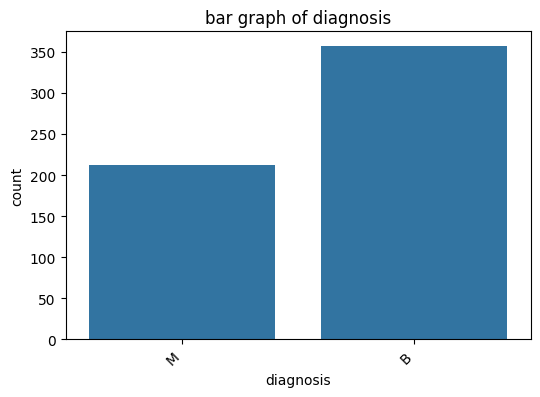

In [15]:
create_barplot('diagnosis')

<p style="background-color:#89cff0;color:black">
The mean smoothness of malignant cases: 4.324 <br>
The mean smoothness of beningn cases: 2.000 <br>
The mean compactness of malignant cases: 0.03228 <br>
The mean compactness of beningn cases:0.021 <br>
The median smoothness of malignant cases: 3.6795  <br>
The median smoothness if beningn cases : 1.851 <br>
The median compactness if malignant cases : 0.0285 <br>
The median compactness if beningn cases : 0.0285 <br>
Since there the number of malignant and beningn cases are not equal so we need to check their distribution using sample with replacement. <br>


<b> </b></p>

<p style="background-color:pink;color:black"><b>Write a function to generate bootstrap samples of the data.</b></p>

In [16]:
def bootstrap_mean(sample_size,feature):
    '''
    there are 10,000 bags
    each bag contains the same number of elements as in feature (sample_size)
    we take mean of each bag
    so we will have 10,000 means
    '''
    mean_of_each_bag=[]
    number_of_bags=10000
    for each_bag in range(0,number_of_bags):
        bag=[]
        for _ in range(0,sample_size):
            bag.append(np.random.choice(feature,replace=True)) #append values 
        mean_of_each_bag.append(np.mean(bag))
        
    return mean_of_each_bag

def bootstrap_median(sample_size,feature):
    '''
    there are 10,000 bags
    each bag contains the same number of elements as in feature (sample_size)
    we take mean of each bag
    so we will have 10,000 means
    '''
    median_of_each_bag=[]
    number_of_bags=10000
    for each_bag in range(0,number_of_bags):
        bag=[]
        for _ in range(0,sample_size):
            bag.append(np.random.choice(feature,replace=True)) #append values 
        median_of_each_bag.append(np.median(bag))
        
    return median_of_each_bag
    
        





In [17]:
sample_size_malignant=len(M_df)
sample_size_beningn=len(B_df)

<b>Compute the mean and median smoothness and compactness for benign and malignant tumors</b>

In [18]:

smoothness_mean_list_M=bootstrap_mean(sample_size_malignant,list(M_df['smoothness_mean']))
smoothness_mean_list_B=bootstrap_mean(sample_size_malignant,list(B_df['smoothness_mean']))

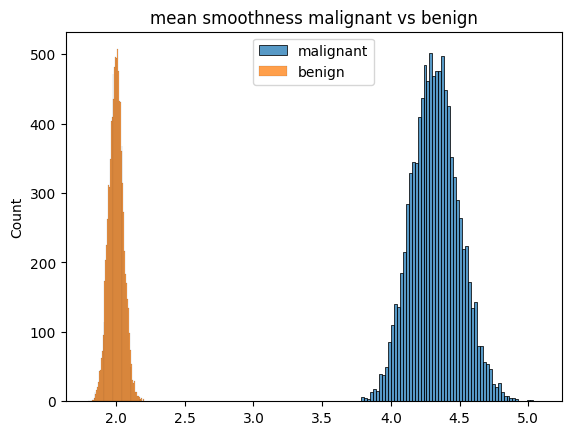

In [19]:
sns.histplot(smoothness_mean_list_M,label="malignant")
sns.histplot(smoothness_mean_list_B,label="benign")
plt.title("mean smoothness malignant vs benign")
plt.legend()

In [20]:
compactness_mean_list_M=bootstrap_mean(sample_size_malignant,list(M_df['compactness_mean']))
compactness_mean_list_B=bootstrap_mean(sample_size_malignant,list(B_df['compactness_mean']))

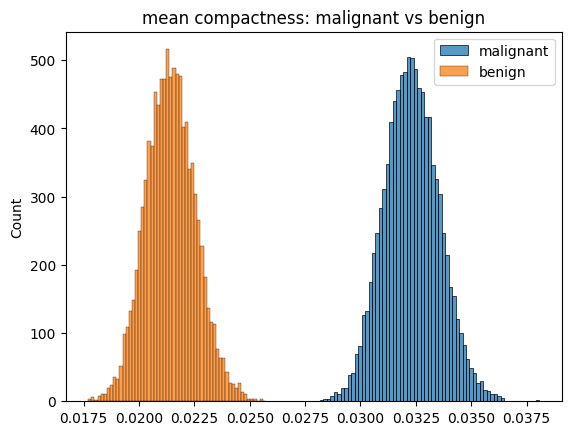

In [21]:
sns.histplot(compactness_mean_list_M,label="malignant")
sns.histplot(compactness_mean_list_B,label="benign")
plt.title("mean compactness: malignant vs benign")
plt.legend()


In [22]:
smoothness_median_list_M=bootstrap_median(sample_size_malignant,list(M_df['smoothness_mean']))
smoothness_median_list_B=bootstrap_median(sample_size_malignant,list(B_df['smoothness_mean']))

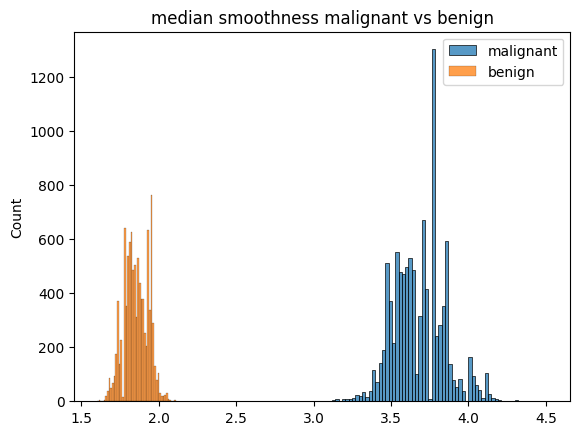

In [23]:
sns.histplot(smoothness_median_list_M,label="malignant")
sns.histplot(smoothness_median_list_B,label="benign")
plt.title("median smoothness malignant vs benign")
plt.legend()

In [24]:
compactness_median_list_M=bootstrap_median(sample_size_malignant,list(M_df['compactness_mean']))
compactness_median_list_B=bootstrap_median(sample_size_malignant,list(B_df['compactness_mean']))

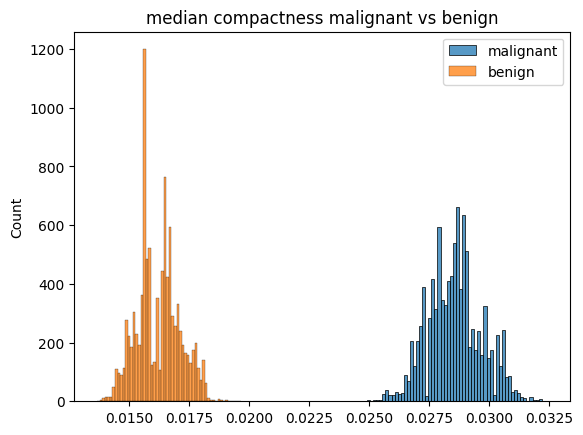

In [25]:
sns.histplot(compactness_median_list_M,label="malignant")
sns.histplot(compactness_median_list_B,label="benign")
plt.title("median compactness malignant vs benign")
plt.legend()

<p style="background-color:#89cff0;color:black"><b>The mean and median smoothness and compactness for benign and malignant
tumors are different . We split the data to that of malignant and benign did sample with replacement of the means and medians of smoothness and median. The graph of these (the mean and median of smoothness of malignant vs benign , similarly for compactness ) and they have no overlap </b></p>

<p style="background-color:pink;color:black"><b>Exploratory Analysis:Identify 2-3 variables that are predictive of a malignant tumor. </b></p>

In [26]:
x_cols=data_pdf.columns.drop('diagnosis') #xcols only has feature variables and not target
y=data_pdf['diagnosis'] #y has the target variable

In [27]:
def cat2bin(categories,cat1,cat2):
    '''
    converting character values to binary values for point biserial
    '''
    c=[]
    for category in categories:
        if category==cat1: #malignant = 1
            c.append(1)
        else:
            c.append(0)
    return c

In [28]:
y_to_bin=cat2bin(data_pdf['diagnosis'],'M','B')


In [29]:
#checks the correlation between diagnoisis and all features and sortes them highest to lowest to decide the most predictive features.
corr=[]
for x in x_cols: #y is the binary variable
    res,_=pointbiserialr(y_to_bin,data_pdf[x])
    corr.append(res)
  
sorted_pairs=sorted(zip(np.abs(corr), x_cols),key=lambda pair: pair[0],reverse=True)
corr_sorted=[pair[0] for pair in sorted_pairs]
x_sorted=[pair[1] for pair in sorted_pairs]
print(corr_sorted)
print(x_sorted)

[0.7935660171412691, 0.7829141371737587, 0.7766138400204347, 0.7764537785950385, 0.742635529725832, 0.73382503492105, 0.7300285113754554, 0.708983836585389, 0.696359707171905, 0.6596102103692323, 0.5965336775082526, 0.5909982378417912, 0.5671338208247171, 0.5561407034314825, 0.5482359402780237, 0.4569028213967977, 0.42146486106640213, 0.4162943110486186, 0.4151852998452039, 0.40804233271650414, 0.35855996508593163, 0.33049855426254654, 0.3238721887208236, 0.29299924424885804, 0.2537297659808302, 0.07797241739025605, 0.06701601057948726, 0.012837602698432366, 0.008303332973877428, 0.006521755870647943]
['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst', 'radius_worst', 'concave_points_worst', 'radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_worst', 'texture_worst', 'symmetry_sd_error', 'area_sd_error', 'smoothness_mean', 'smoothness_sd_error', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_sd_error', 'radius_sd_error', 'co

<p style="background-color:#89cff0;color:black"><b> Here we see that 'fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error' have the highest correlation with the target.   </b></p>

In [32]:
#creating a correlation pdf c_pdf that has the features chosen from above and the target variable
y_temp=y
#c_df=data_pdf[['fractal_dimension_mean', 'smoothness_sd_error', 'concave_points_mean']].copy()
c_df=data_pdf[['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error']].copy()
c_df['diagnosis']=y_temp

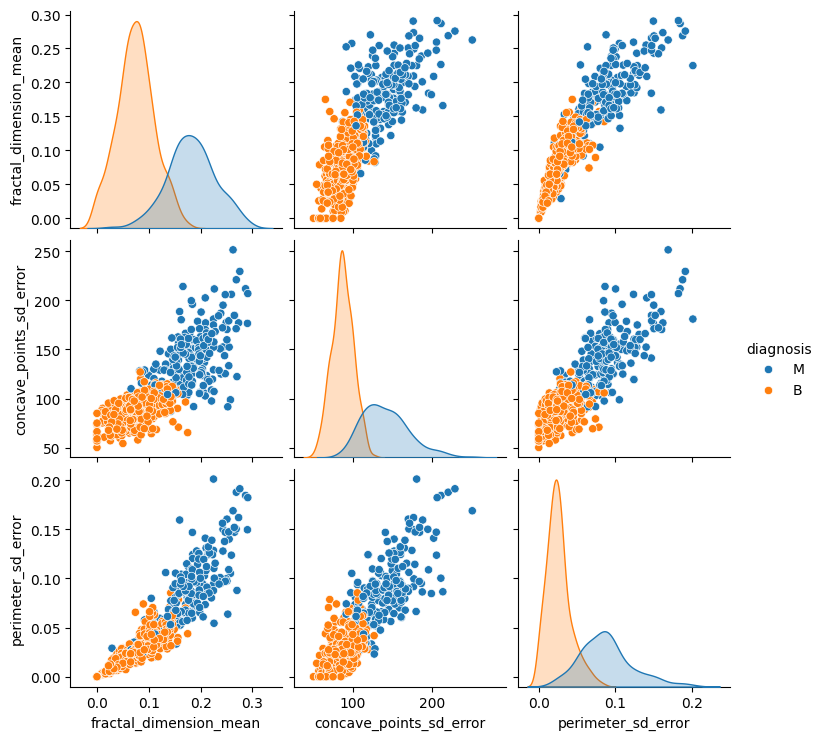

In [33]:
sns.pairplot(c_df,hue="diagnosis")


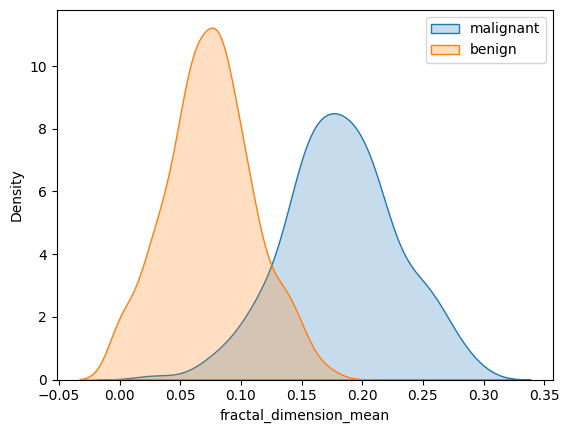

In [34]:

sns.kdeplot(M_df["fractal_dimension_mean"],fill=True,label="malignant")
sns.kdeplot(B_df["fractal_dimension_mean"],fill=True,label="benign")
plt.legend()

<p style="background-color:#89cff0;color:black"><b> we see that as the fractal_dimension_mean increases the likelihood of the tumor being malignant increases. However , for fractal_dimension_mean value around 0.125 the chances of the tumor being either malignant or benign is almost equal. The most common fractal_dimension_mean for malignant tumor is around 0.20. In the given dataset if the value of the fractal_dimension is greater than 0.20 , then it indicates that it is most likely a malignant case. </b></p>

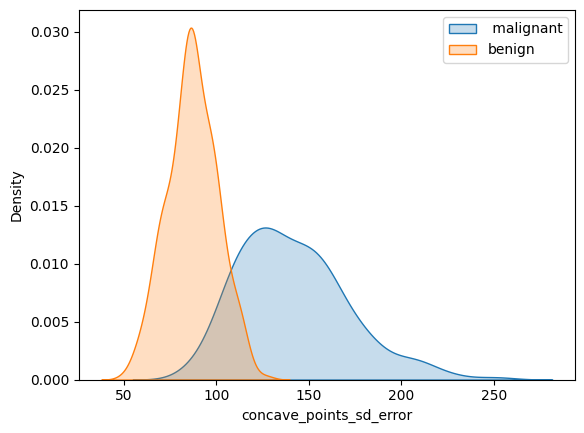

In [35]:
sns.kdeplot(M_df["concave_points_sd_error"],fill=True,label=" malignant")
sns.kdeplot(B_df["concave_points_sd_error"],fill=True,label="benign")
plt.legend()

<p style="background-color:#89cff0;color:black"><b> we see that as the concave_points_sd_error increases the likelihood of the tumor being malignant increases. However when this value is around 100 , the densities of malignant and benign cases are almost equal. The most common value in malignant cases is 125 . In this dataset for values over 125 , the case is mostly malignant </b></p>

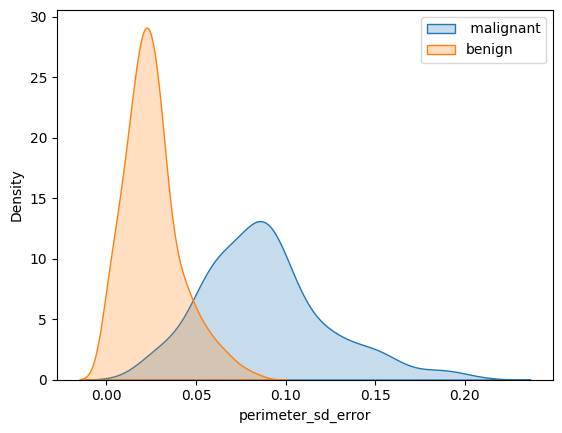

In [36]:

sns.kdeplot(M_df["perimeter_sd_error"],fill=True,label=" malignant")
sns.kdeplot(B_df["perimeter_sd_error"],fill=True,label="benign")
plt.legend()

<p style="background-color:#89cff0;color:black"><b> we see that as the perimeter_sd_error increases the likelihood of the tumor being malignant increases. However when this value is around 0.05 , the densities of malignant and benign cases are almost equal. The most common value in malignant cases is 0.10 . In this dataset for values over 0.10 , the case is mostly malignant </b></p>

<b> Transforming data before applying to the model </b>

Removing redundant features 

In [37]:
copy_data_pdf=data_pdf.copy() 
corr_pdf=pd.DataFrame(columns=['col1','col2','corr'])
cols_itr=data_pdf.columns
i=0
important_features=['diagnosis','fractal_dimension_mean','concave_points_sd_error','perimeter_sd_error']
cols=cols_itr
cols_retained=cols_itr
for col in cols_itr:
    print(f" 1) col1 is {col}")
    if col in cols:
       cols=cols.drop(col)
    for other_cols in cols:
            print(f"2)comparing {col} to {other_cols}")
            if col=='diagnosis':
                 print(f"[if 1] col is {col}")
                 r,_=pointbiserialr(cat2bin(copy_data_pdf[col],'M','B'),copy_data_pdf[other_cols])
                 if r>0.6 and other_cols not in important_features:
                      print(f"dropping {other_cols} due to high correlation")
                      cols=cols.drop(other_cols)
                      cols_retained=cols
                      print(f"now cols: {cols}")
                      print(f"len is {len(cols)}")
                      print("---------------------------")
            elif other_cols=='diagnosis':
                 print(f"[if 2] col is {other_cols}")
                 r,_=pointbiserialr(cat2bin(copy_data_pdf[other_cols],'M','B'),copy_data_pdf[col])
                 if r>0.6 and col not in important_features:
                      print(f"dropping {col} due to high correlation")
                      cols=cols.drop(col)
                      cols_retained=cols
                      print(f"now cols: {cols}")
                      print(f"len is {len(cols)}")
                      print("---------------------------")
            elif col in important_features:
                 print(f"[if 3] col is in {important_features}")
                 print(f"checking the corr of {col} with {other_cols}")
                 r,_=spearmanr(copy_data_pdf[col],copy_data_pdf[other_cols])
                 if r>0.6 and other_cols not in important_features:
                      print(f"correlation is >0.6 so deleting {other_cols}")
                      #copy_data_pdf=copy_data_pdf.drop(other_cols,axis=1)
                      cols=cols.drop(other_cols)
                      cols_retained=cols
                      print(f"now cols: {cols}")
                      print(f"len is {len(cols)}")
                      print("---------------------------")



reduced_data_pdf=copy_data_pdf[cols_retained]

#top3: 'fractal_dimension_mean', 'concave_points_sd_error', 'texture_worst'
#throw: 'symmetry_worst','perimeter_sd_error','radius_mean','radius_worst','texture_mean',concavity_worst,'perimeter_sd_error',concavity_worst 'radius_worst', 'concave_points_worst', 'radius_mean', 'texture_mean','perimeter_mean'.'symmetry_sd_error'


 1) col1 is diagnosis
2)comparing diagnosis to radius_mean
[if 1] col is diagnosis
dropping radius_mean due to high correlation
now cols: Index(['radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error',
       'texture_worst', 'perimeter_mean', 'perimeter_sd_error',
       'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst',
       'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst',
       'compactness_mean', 'compactness_sd_error', 'compactness_worst',
       'concavity_mean', 'concavity_sd_error', 'concavity_worst',
       'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')
len is 29
---------------------------
2)comparing diagnosis to radius_sd_error
[if 1] col is diagnosis
2)comparing diagnosis to radius_worst
[if 1] col is diagnosis
dropping radiu

In [38]:
reduced_data_pdf

,perimeter_worst,area_mean,area_worst,smoothness_worst,concavity_mean,concavity_sd_error,concave_points_mean,concave_points_sd_error,symmetry_mean,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,0.2419,0.07871,0.9053,0.006399,0.03003,0.006193,17.33,184.60,0.16220,0.2654,0.4601,0.11890
1,0.1812,0.05667,0.7339,0.005225,0.01389,0.003532,23.41,158.80,0.12380,0.1860,0.2750,0.08902
2,0.2069,0.05999,0.7869,0.006150,0.02250,0.004571,25.53,152.50,0.14440,0.2430,0.3613,0.08758
3,0.2597,0.09744,1.1560,0.009110,0.05963,0.009208,26.50,98.87,0.20980,0.2575,0.6638,0.17300
4,0.1809,0.05883,0.7813,0.011490,0.01756,0.005115,16.67,152.20,0.13740,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.1726,0.05623,1.2560,0.010300,0.01114,0.004239,26.40,166.10,0.14100,0.2216,0.2060,0.07115
565,0.1752,0.05533,2.4630,0.005769,0.01898,0.002498,38.25,155.00,0.11660,0.1628,0.2572,0.06637
566,0.1590,0.05648,1.0750,0.005903,0.01318,0.003892,34.12,126.70,0.11390,0.1418,0.2218,0.07820
567,0.2397,0.07016,1.5950,0.006522,0.02324,0.006185,39.42,184.60,0.16500,0.2650,0.4087,0.12400


Apply scaler transformation to features not in range -3 or 3 (also applied for features that has a very small value like 0.001)

In [39]:
scaler=StandardScaler()
features_to_scaled=["concave_points_mean","concave_points_sd_error","smoothness_worst","concavity_sd_error"]
concave_points_mean_scaled=scaler.fit_transform(reduced_data_pdf[["concave_points_mean"]])
concave_points_sd_error_scaled=scaler.fit_transform(reduced_data_pdf[["concave_points_sd_error"]])
smoothness_worst_scaled=scaler.fit_transform(reduced_data_pdf[["smoothness_worst"]])
concavity_sd_error_scaled=scaler.fit_transform(reduced_data_pdf[["concavity_sd_error"]])

cleaned_df=reduced_data_pdf.drop(features_to_scaled,axis=1)

In [40]:
cleaned_df['concave_points_mean_scaled']=concave_points_mean_scaled
cleaned_df['concave_points_sd_error_scaled']=concave_points_sd_error_scaled
cleaned_df['smoothness_worst_scaled']=smoothness_worst_scaled
cleaned_df['concavity_sd_error_scaled']=concavity_sd_error_scaled

In [41]:
cleaned_df #ready to be used for prediction

,perimeter_worst,area_mean,area_worst,concavity_mean,symmetry_mean,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,concave_points_mean_scaled,concave_points_sd_error_scaled,smoothness_worst_scaled,concavity_sd_error_scaled
0,0.2419,0.07871,0.9053,0.03003,0.16220,0.2654,0.4601,0.11890,-1.359293,2.303601,-0.214002,0.907083
1,0.1812,0.05667,0.7339,0.01389,0.12380,0.1860,0.2750,0.08902,-0.369203,1.535126,-0.605351,-0.099444
2,0.2069,0.05999,0.7869,0.02250,0.14440,0.2430,0.3613,0.08758,-0.023974,1.347475,-0.297005,0.293559
3,0.2597,0.09744,1.1560,0.05963,0.20980,0.2575,0.6638,0.17300,0.133984,-0.249939,0.689702,2.047511
4,0.1809,0.05883,0.7813,0.01756,0.13740,0.1625,0.2364,0.07678,-1.466770,1.338539,1.483067,0.499328
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.1726,0.05623,1.2560,0.01114,0.14100,0.2216,0.2060,0.07115,0.117700,1.752563,1.086384,0.167980
565,0.1752,0.05533,2.4630,0.01898,0.11660,0.1628,0.2572,0.06637,2.047399,1.421940,-0.424010,-0.490556
566,0.1590,0.05648,1.0750,0.01318,0.11390,0.1418,0.2218,0.07820,1.374854,0.579001,-0.379342,0.036727
567,0.2397,0.07016,1.5950,0.02324,0.16500,0.2650,0.4087,0.12400,2.237926,2.303601,-0.173000,0.904057


In [42]:
y=data_pdf['diagnosis']

<p style="background-color:pink;color:black"><b>Modeling: Build a model to predict the malignant tumors. </b></p>

In [43]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [46]:
c_df

,fractal_dimension_mean,concave_points_sd_error,perimeter_sd_error,diagnosis
0,0.2654,184.60,0.14710,M
1,0.1860,158.80,0.07017,M
2,0.2430,152.50,0.12790,M
3,0.2575,98.87,0.10520,M
4,0.1625,152.20,0.10430,M
...,...,...,...,...
564,0.2216,166.10,0.13890,M
565,0.1628,155.00,0.09791,M
566,0.1418,126.70,0.05302,M
567,0.2650,184.60,0.15200,M


In [47]:
X_train, X_test, y_train, y_test=train_test_split(cleaned_df,y,train_size=0.8,test_size=0.2,random_state=42)
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(c_df.drop('diagnosis',axis=1),y,train_size=0.8,test_size=0.2,random_state=42)

since n is small and m is intermediate , I will choose svm with rbf kernel

In [77]:
svm_classifier=SVC(C=1,kernel='rbf',random_state=42)
svm_classifier.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [68]:
svm_classifier_2=SVC(kernel='linear',random_state=42)
svm_classifier_2.fit(X_train_2,y_train_2)

SVC(kernel='linear', random_state=42)

In [78]:
svm_classifier.score(X_test,y_test)

0.9824561403508771

In [ ]:
svm_classifier_2.score(X_test_2,y_test_2) #using only the 3 important features

0.9649122807017544

<b> we can see that choosing the three features that had high correlation with the target seems to be giving us good results </b>

In [79]:
#using all 11 features
tn,fp,fn,tp=confusion_matrix(y_test,svm_classifier.predict(X_test)).ravel()
#TN FP
#FN TP
print(f"false negative: {fn}")
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*precision*recall/(precision+recall)
acc=svm_classifier.score(X_test,y_test)
print(f"precision: {precision} \n recall:{recall} \n f1_score:{f1_score} \n accuracy: {acc}")


false negative: 2
precision: 1.0 
 recall:0.9534883720930233 
 f1_score:0.9761904761904763 
 accuracy: 0.9824561403508771


In [53]:
intercept=svm_classifier.intercept_[0]
weights=svm_classifier.coef_[0]
features=svm_classifier.feature_names_in_
print(list(zip(features,weights)))

[('perimeter_worst', 0.6707920926154031), ('area_mean', 0.1463870165178492), ('area_worst', -1.21946478843337), ('concavity_mean', 0.07309109777269622), ('symmetry_mean', 0.8064993319475362), ('fractal_dimension_mean', 1.3698597444258054), ('fractal_dimension_sd_error', 1.9983170115002018), ('fractal_dimension_worst', 0.4766619942755107), ('concave_points_mean_scaled', 1.0223771522436182), ('concave_points_sd_error_scaled', 2.789474473292066), ('smoothness_worst_scaled', 0.6426418177714182), ('concavity_sd_error_scaled', 0.1564551501319525)]


In [83]:
from sklearn.inspection import permutation_importance
# Compute permutation importance
results = permutation_importance(svm_classifier, X_test, y_test, n_repeats=10, random_state=42)

for i, importance in enumerate(results.importances_mean):
    print(f"{svm_classifier.feature_names_in_[i]} : {importance}")
    #print(f"Feature {i+1}: {importance}")

perimeter_worst : 0.0
area_mean : 0.0
area_worst : 0.02280701754385961
concavity_mean : 0.0
symmetry_mean : 0.0
fractal_dimension_mean : 0.0070175438596490666
fractal_dimension_sd_error : 0.004385964912280682
fractal_dimension_worst : 0.0
concave_points_mean_scaled : 0.08070175438596486
concave_points_sd_error_scaled : 0.39035087719298234
smoothness_worst_scaled : 0.028070175438596467
concavity_sd_error_scaled : 0.02017543859649118


 <b>important features are : concave_points_sd_error_scaled ,concave_points_mean_scaled ,smoothness_worst_scaled  </b>

In [90]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [91]:
tn,fp,fn,tp=confusion_matrix(y_test,dtc.predict(X_test)).ravel()
#TN FP
#FN TP
print(f"false negative: {fn}")
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*precision*recall/(precision+recall)
acc=dtc.score(X_test,y_test)

print(f"precision: {precision} \n recall:{recall} \n f1_score:{f1_score} \n accuracy: {acc}")


false negative: 3
precision: 0.9302325581395349 
 recall:0.9302325581395349 
 f1_score:0.9302325581395349 
 accuracy: 0.9473684210526315


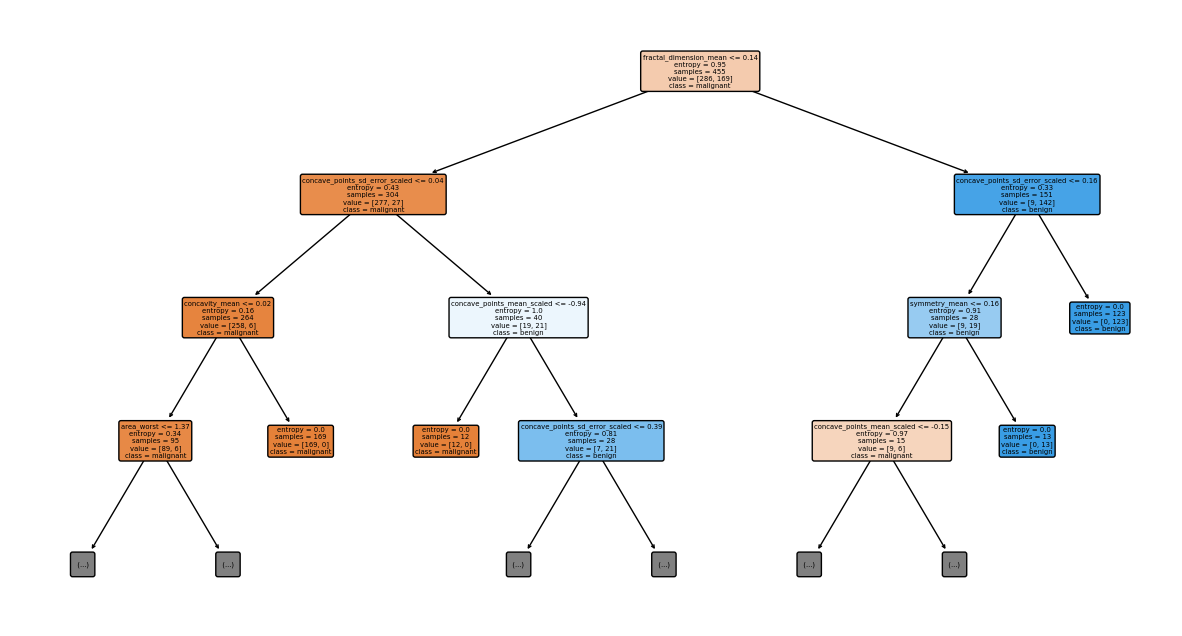

In [92]:
plt.figure(figsize=(15, 8))
plot_tree(
    dtc,
    rounded=True,
    precision=2,
    filled=True, 
    feature_names=features, 
    class_names=['malignant', 'benign'],
    max_depth=3
)
plt.show()

 <b>The shortest path to a leaf node (pure) is fractal_dimension_mean -> concave_points_sd_error_scaled  </b>

<p style="background-color:#89cff0;color:black"><b>Use at least two classification techniques; compare and contrast the advantages
and disadvantages of each. </b> <br>
I used SVM classifier and decision tree . SVM tries to create a decision boundary that can seperate the two classes. The important consideration for SVM is maximum margin. Whereas decision tree splits the data based on criterion such as gini , entropy , log loss etc. <br>
SVM generalises well for new samples or a small change in the original data than decision tree because decision tree are not robust to such changes. <br>
But decision tree requires very little pre-processing and are simple to understand and to interpret.

</p>

<p style="background-color:#89cff0;color:black"><b>Identify how you would control for overfitting in each classification technique.</b> <br>
SVM can be affected by overfitting  if the value of C high so that the training loss is low (but the testing loss could be high). To prevent it , value of C should be low (soft-margin) <br>
For decision trees , as the number of features increases the decision tree it can capture noise and can lead to overfitting. In order to prevent we could control the maximum depth(pre-pruning) as well as removing features that have low predictive power (that are towards the bottom of the tree -which will have fewer samples)[post-pruning]

</p>

<p style="background-color:#89cff0;color:black"><b>Evaluate the performance of each model.</b> <br>
SVM <br>
precision: 1.0 <br>
 recall:0.953 <br>
 f1_score:0.976 <br>
 accuracy: 0.982<br>
 Decision tree <br>
precision: 0.930<br>
 recall:0.930<br>
 f1_score:0.930 <br>
 accuracy: 0.947<br>
 Both the model have really good performance in terms of accuracy , precision , recall and f1 score. However , SVM ...marginally .. outperforms the decision tree. But since the application would require FN to be reduced (the model classifying a malignant case as benign , we can see that SVM would be the choice since it results in fewer number of FN cases (2 compared to 3 of decision trees)) 
</p>

<p style="background-color:#89cff0;color:black"><b>In each model, identify the most important predictive variables and explain how
you identified them. </b><br>
For SVM , i looked at the weights that was assigned to each feature by the model and chose three with highest values :concave_points_sd_error_scaled ,concave_points_mean_scaled ,smoothness_worst_scaled <br>
For decision tree, I selected the shortest path to a pure leaf . So these once we know the value of these features , we will know if the case is malignant or beningn:The shortest path is fractal_dimension_mean -> concave_points_sd_error_scaled .
From both these cases , we can infer that concave_points_sd_error_scaled is an important feature
</p>

<p style="background-color:pink;color:black"><b>Explanation </b></p>

<p style="background-color:#89cff0;color:black"><b>Explain the limitations of your analysis and identify possible further steps you
could take</b> <br>
The biggest limitation is the multicollinearity as all of the variables seemed to have strong correlation with each other. I manually selected features based on which variables are highly correlated to the target and dropping the features strongly correlated to those variables. <br>
Next limitation is , for SVM the choice of kernel and other hyperparameters such as C, gamma etc are non trivial. For decision tree , due to large number of features , it could be prone to overfitting . Decision trees , random forest are not affected by multicollinearity (still they will be affeacted by large number of variables). I would try to use RandomForest to see if it will improve the performance. And try to find methods that can indicate the predictive power of variables 
</p>

<p style="background-color:#89cff0;color:black"><b>Write a short summary of your analysis, explaining how your model works and
how it performs. Briefly explain the factors that contributed to malignant vs benign tumor
identification.</b> <br>
This is a classification problem . Therefore , I used Support Vector Machine that can generalise well for new data as it focuses on maximum margin. I also used decision tree , which uses entropy (amount of 'heterogeneity') to split on the features until we get paths that predict whether the case is malignant or benign.<br>
We saw that the features with the highest predictive power are : fractal_dimension_mean, concave_points_sd_error_scaled and concave_points_mean_scaled. And we saw that as their values increases , the chances of the case being malignant also increases. 
</p>